In [1]:
# Exam
# 1) 경찰청 졸음운전교통사고 정보를 사용하여 년도별, 사건, 사망, 부상에 건수를 시각화하시오.
# 2) 소설 “키다리아저씨소설”에서 가장 빈도수가 높은 상의 5개의 단어를 구하시오.
# 3) 소설 “키다리아저씨소설”을 사용하여 wordcloud를 시각화하시오.

In [2]:
# 1) 경찰청 졸음운전교통사고 정보를 사용하여 년도별, 사건, 사망, 부상에 건수를 시각화하시오.
import pandas as pd
import numpy as np
df = pd.read_csv('./경찰청_졸음운전교통사고_2014_2016.csv', encoding='cp949')
df.index

RangeIndex(start=0, stop=36, step=1)

In [3]:
# 그래프 한글 대응
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')

In [4]:
df.shape

(36, 4)

In [5]:
df.columns

Index(['구분', '사고(건)', '사망(명)', '부상(명)'], dtype='object')

In [6]:
df.head()

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358
3,2014년4월,182,4,360
4,2014년5월,218,17,474


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
구분       36 non-null object
사고(건)    36 non-null int64
사망(명)    36 non-null int64
부상(명)    36 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [8]:
df['년도'] = df['구분'].str[:4]

In [9]:
df_calculated = df.groupby('년도').sum()
df_calculated

,사고(건),사망(명),부상(명)
년도,,,
2014,2426,130,4679
2015,2701,108,5525
2016,2433,98,4899


In [10]:
labels = ['2014년', '2015년', '2016년']
labels

['2014년', '2015년', '2016년']

In [11]:
index = np.arange(len(labels))
index

array([0, 1, 2])

In [12]:
df_calculated

,사고(건),사망(명),부상(명)
년도,,,
2014,2426,130,4679
2015,2701,108,5525
2016,2433,98,4899


In [13]:
df_calculated['사고(건)'] = df_calculated['사고(건)'].astype('float')
df_calculated['사망(명)'] = df_calculated['사망(명)'].astype('float')
df_calculated['부상(명)'] = df_calculated['부상(명)'].astype('float')

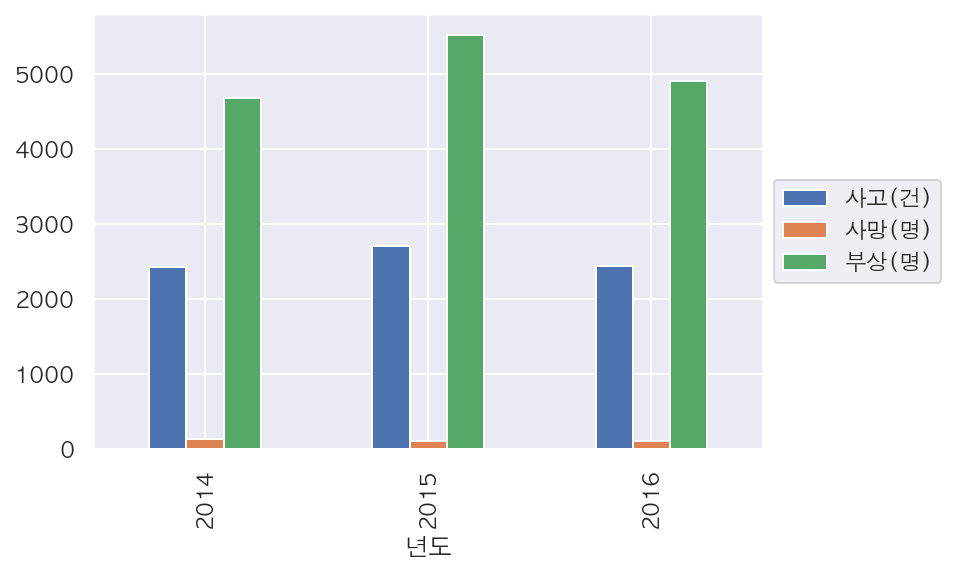

In [14]:
plot = df_calculated.plot(kind='bar')
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
# 2) 소설 “키다리아저씨소설”에서 가장 빈도수가 높은 상의 5개의 단어를 구하시오.
from konlpy.tag import Twitter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import nltk

t = Twitter()

/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [16]:
# readline_test.py
f = open("./키다리아저씨.txt", 'r', encoding = 'cp949')
novel = f.read()

print(novel)
f.close()






  진 웹스터 소설
『키다리 아저씨』 우리말 옮김






글쓴이 : 진 웹스터 (Jean Webster) 
       (미국 소설가. 1876~1916년)


우리말로 옮긴이 : 마음 블로그
( https://blog.naver.com/osy2201 )

 

“재미 삼아 읽어주세요~. 
정확한 해석 아닙니다.
정확하게 해석할 영어 실력 안 됨 ㅠ_ㅜ”




소 개
- 진 웹스터 소설 『키다리 아저씨』 우리말 옮김


■ 들어가며

정확한 해석 아닙니다. 제가 잘 모르겠는 문장이나 단어는, 앞뒤 문맥을 봐서 크게 틀리지 않는 선에서 짜 맞추겠습니다. 정확한 해석은 시중 서점에 좋은 번역서들이 많이 나와 있으니 참조해주시고, 제 블로그에 올리는 글들은 그냥 참고용으로만 감상해주세요~
『키다리 아저씨』는 1912년에 ‘진 웹스터’(여자이름)가 쓴 편지형식의 소설임. 소설 앞부분만 소설형식이고, 그 뒤부턴 계속 여주인공이 쓴 편지들임.
원문은 ‘프로젝트 구텐베르크’(=영어소설 무료로 보는 곳)에 올라와 있는 1912년 판을 참조했습니다.
“프로젝트-구텐베르크”사이트의 『키다리 아저씨』(영문 사이트) 링크 ▶ http://www.gutenberg.org/files/40426/40426-h/40426-h.htm
위의 링크를 두 번 클릭하셔야 페이지가 제대로 열립니다. 왜냐면 구텐베르크는 직접 링크를 허락하지 않기에, 사용자가 직접 접속을 하려면 링크를 한 번 눌러 구텐베르크 사이트를 띄운 후 다시 링크를 눌러 해당 페이지에 접속하셔야 합니다.
소설엔 간단한 스케치들과 사진이 많이 나옵니다. 해당하는 스케치들과 사진이 나올 때마다 ‘프로젝트 구텐베르크’의 이미지를 링크시켜서 볼 수 있게 하겠습니다.
해석에는 다음Daum사전, 네이버사전, 영한엣센스 영어사전을 참조함~



(소설 시작)



당신


키다리 아저씨께



키다리 아저씨



1장. “짱 나는 수요일” 
(원문→“우울한 수요일”)



매월 첫 번째 수요일은 너무도 끔직한 날이었다. 두려움

In [17]:
novel_calculated = t.pos(novel)

In [30]:
novel_calculated_temp = nltk.Text(novel_calculated, name = '키다리 아저씨 단어')
novel_calculated_pos =novel_calculated_temp.vocab().most_common(100)

# WorldCloud Data 작성
novel_calculated_wordcloud = novel_calculated

In [19]:
novel_calculated_temp.vocab().most_common(100)

[(('.', 'Punctuation'), 3805),
 (('\n', 'Foreign'), 2811),
 ((')', 'Punctuation'), 2239),
 (('(', 'Punctuation'), 1933),
 ((',', 'Punctuation'), 1922),
 (('을', 'Josa'), 1474),
 (('에', 'Josa'), 1380),
 (('이', 'Josa'), 1147),
 (('의', 'Josa'), 1135),
 (('가', 'Josa'), 941),
 (('를', 'Josa'), 826),
 (('들', 'Suffix'), 685),
 (('제', 'Noun'), 658),
 (('‘', 'Foreign'), 590),
 (('아저씨', 'Noun'), 542),
 (('은', 'Josa'), 444),
 (('\n\n', 'Foreign'), 441),
 (('는', 'Josa'), 440),
 (('통', 'Noun'), 434),
 (('로', 'Josa'), 415),
 (('1', 'Number'), 400),
 (('도', 'Josa'), 396),
 (('에', 'Foreign'), 391),
 (('거', 'Noun'), 383),
 (('편지', 'Noun'), 382),
 (('그', 'Noun'), 366),
 (('이', 'Noun'), 365),
 (('2', 'Number'), 338),
 (('…', 'Punctuation'), 328),
 (('학년', 'Noun'), 327),
 (('있는', 'Adjective'), 324),
 (('세', 'Noun'), 310),
 (('총', 'Noun'), 307),
 (('보냄', 'Verb'), 301),
 (('?', 'Punctuation'), 299),
 (('에서', 'Josa'), 296),
 (('한', 'Verb'), 295),
 (('대학교', 'Noun'), 290),
 (('저', 'Noun'), 290),
 (('번', 'Noun'),

In [20]:
# StopWord가 너무 많은 관계로 맨 위의 기호는 삭제하고 아래 단어(조사)로 대체
# 단어 사전 정의 : 
# 언어 분리하여 자립적으로 쓸 수 있는 말이나 이에 준하는 말. 
# 또는 그 말의 뒤에 붙어서 문법적 기능을 나타내는 말. 
# “철수가 영희의 일기를 읽은 것 같다.”에서 자립적으로 쓸 수 있는 ‘철수’, ‘영희’, ‘일기12’, ‘읽은’, ‘같다’와 
# 조사 ‘가11’, ‘의10’, ‘를’, 의존 명사 ‘것1’ 따위이다. ≒낱말2ㆍ어사10(語詞).

novel_calculated_pos = novel_calculated_pos[5:10]

In [21]:
novel_calculated_pos

[(('을', 'Josa'), 1474),
 (('에', 'Josa'), 1380),
 (('이', 'Josa'), 1147),
 (('의', 'Josa'), 1135),
 (('가', 'Josa'), 941)]

In [33]:
# 3) 소설 “키다리아저씨소설”을 사용하여 wordcloud를 시각화하시오.
# 단어를 기준으로 작성
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
from konlpy.tag import Twitter; t = Twitter()
from PIL import Image
mask = np.array(Image.open('./키다리 아저씨.jpeg'))
image_colors = ImageColorGenerator(mask)

In [32]:
novel_calculated

[('\n\n\n\n\n  ', 'Foreign'),
 ('진', 'Noun'),
 ('웹스터', 'Noun'),
 ('소설', 'Noun'),
 ('\n', 'Foreign'),
 ('『', 'Foreign'),
 ('키다리', 'Noun'),
 ('아저씨', 'Noun'),
 ('』', 'Foreign'),
 ('우리말', 'Noun'),
 ('옮김', 'Verb'),
 ('\n\n\n\n\n\n\n', 'Foreign'),
 ('글', 'Noun'),
 ('쓴이', 'Verb'),
 (':', 'Punctuation'),
 ('진', 'Noun'),
 ('웹스터', 'Noun'),
 ('(', 'Punctuation'),
 ('Jean', 'Alpha'),
 ('Webster', 'Alpha'),
 (')', 'Punctuation'),
 ('(', 'Punctuation'),
 ('미국', 'Noun'),
 ('소설가', 'Noun'),
 ('.', 'Punctuation'),
 ('1876~1916년', 'Number'),
 (')', 'Punctuation'),
 ('\n\n\n', 'Foreign'),
 ('우리말', 'Noun'),
 ('로', 'Josa'),
 ('옮긴이', 'Verb'),
 (':', 'Punctuation'),
 ('마음', 'Noun'),
 ('블로그', 'Noun'),
 ('\n', 'Foreign'),
 ('(', 'Punctuation'),
 ('https://blog.naver.com/osy2201', 'URL'),
 (')', 'Punctuation'),
 ('\n\n \n\n', 'Foreign'),
 ('“', 'Foreign'),
 ('재미', 'Noun'),
 ('삼아', 'Verb'),
 ('읽어주세요', 'Verb'),
 ('~.', 'Punctuation'),
 ('정확한', 'Adjective'),
 ('해석', 'Noun'),
 ('아닙니다', 'Adjective'),
 ('.', 'Punctuat

In [38]:
wc = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', background_color = 'white', max_words=2000, mask =  mask)
wc = wc.generate(novel)
wc.words_

{'제가': 1.0,
 '그리고': 0.5245398773006135,
 '키다리 아저씨': 0.48466257668711654,
 '하지만': 0.46319018404907975,
 '거예요': 0.3834355828220859,
 '정말': 0.3588957055214724,
 '아빠': 0.34355828220858897,
 '있어요': 0.34049079754601225,
 'ㅋㅋ': 0.3282208588957055,
 '있는': 0.31901840490797545,
 '그래서': 0.29141104294478526,
 '1통 보냄': 0.26993865030674846,
 '1통을 보냄': 0.26993865030674846,
 '너무': 0.25766871165644173,
 '지금': 0.254601226993865,
 '18세 대학교1학년': 0.25153374233128833,
 '원문에 있는': 0.2392638036809816,
 'www gutenberg': 0.2147239263803681,
 'gutenberg org': 0.2147239263803681,
 'org files': 0.2147239263803681,
 '19세 대학교2학년': 0.2147239263803681,
 '아저씨가': 0.20245398773006135,
 '그런': 0.18711656441717792,
 '다른': 0.18711656441717792,
 '같은': 0.18404907975460122,
 '저는': 0.18098159509202455,
 '저비스 도련님': 0.17791411042944785,
 '제게': 0.17484662576687116,
 '학기 입학': 0.17484662576687116,
 '뭐예요': 0.17177914110429449,
 '보낸 편지': 0.17177914110429449,
 '편지를': 0.1687116564417178,
 'http me2': 0.1687116564417178,
 'me2 do': 0.16871

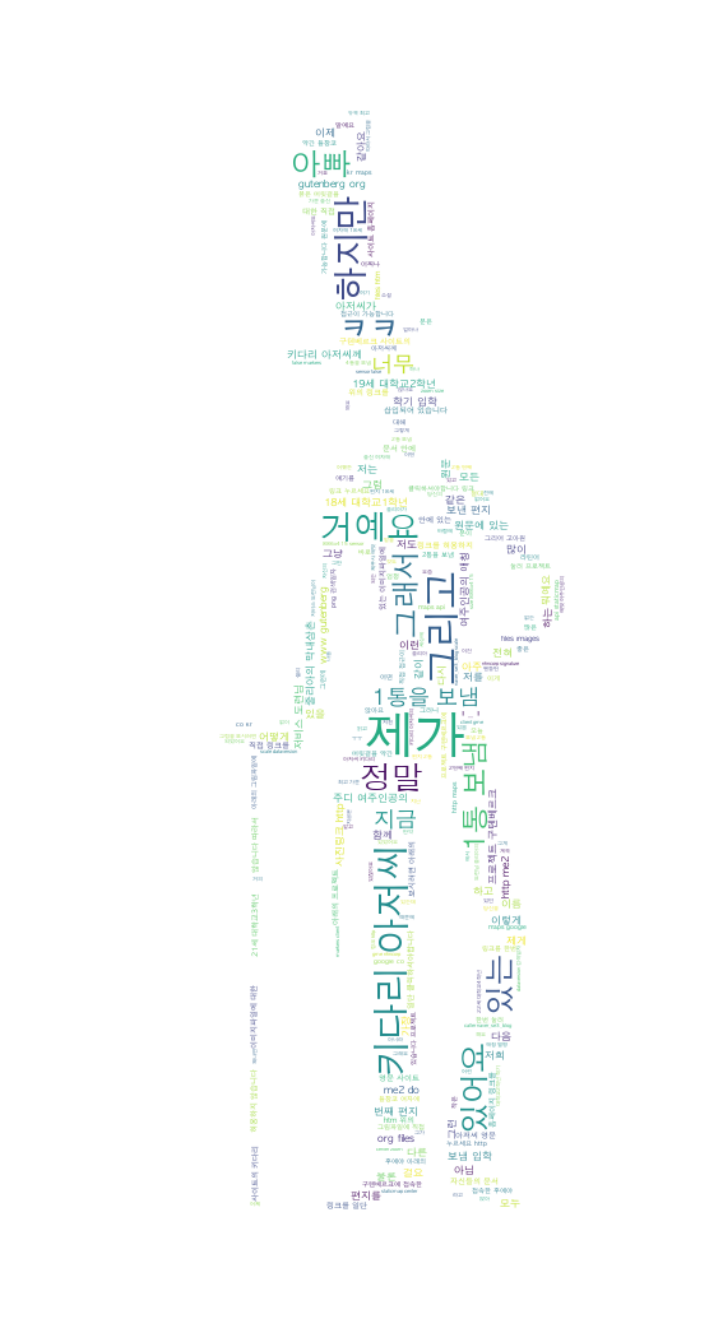

In [39]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()